In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and_dog

In [39]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=32,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# test_dir has no subfolders, so we use a workaround:
test_data_gen = test_image_generator.flow_from_directory(
    directory="/content/cats_and_dogs",  # go to base folder
    classes=['test'],    # manually pick the 'test' folder
    batch_size=32,
    shuffle=False,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


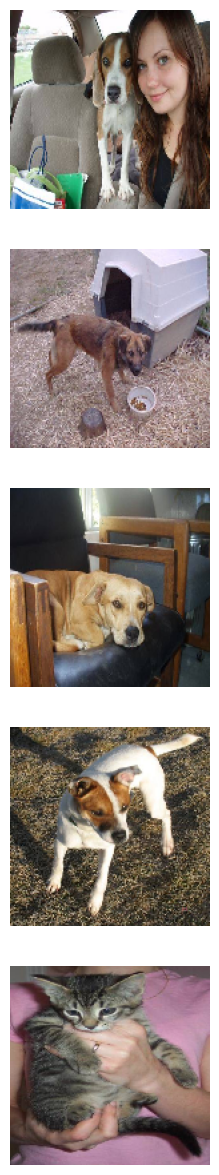

In [11]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [12]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



Found 2000 images belonging to 2 classes.


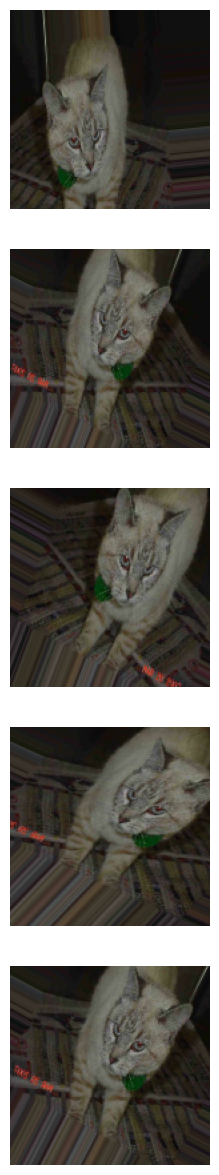

In [13]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [16]:
# 7
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
#8

history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=20,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.5333 - loss: 0.9355 - val_accuracy: 0.5020 - val_loss: 0.6900
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 147s 9s/step - accuracy: 0.5234 - loss: 0.6944 - val_accuracy: 0.5700 - val_loss: 0.6756
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 134s 8s/step - accuracy: 0.5438 - loss: 0.6832 - val_accuracy: 0.6550 - val_loss: 0.6290
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 125s 8s/step - accuracy: 0.5737 - loss: 0.6633 - val_accuracy: 0.6200 - val_loss: 0.6328
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 9s/step - accuracy: 0.6335 - loss: 0.6468 - val_accuracy: 0.6740 - val_loss: 0.5905
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 8s/step - accuracy: 0.6574 - loss: 0.6185 - val_accuracy: 0.6520 - val_loss: 0.6045
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.6595 - loss: 0.6093 - val_accuracy: 0.6870 - val_loss: 0.5659
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 8s/step - accuracy: 0.6639 - loss: 0.6061 - val_accuracy: 0.6470 - v

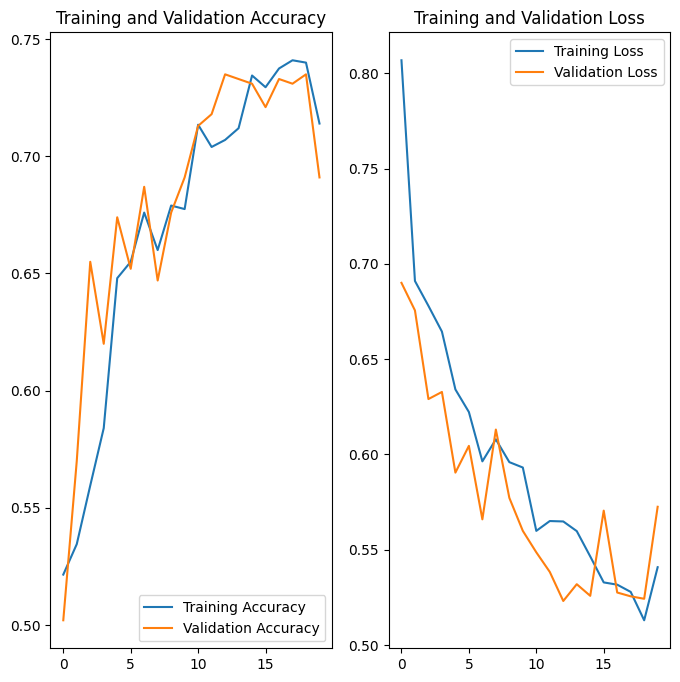

In [19]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# The model was trained for 20 epochs, so use that value for the range
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
# Get the shape from the images in the first batch
image_shape = test_data_gen[0][0].shape
print(image_shape)

# or to get total num of images
print(len(test_data_gen))

(150, 150, 3)
2


Found 50 validated image filenames.
 4/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


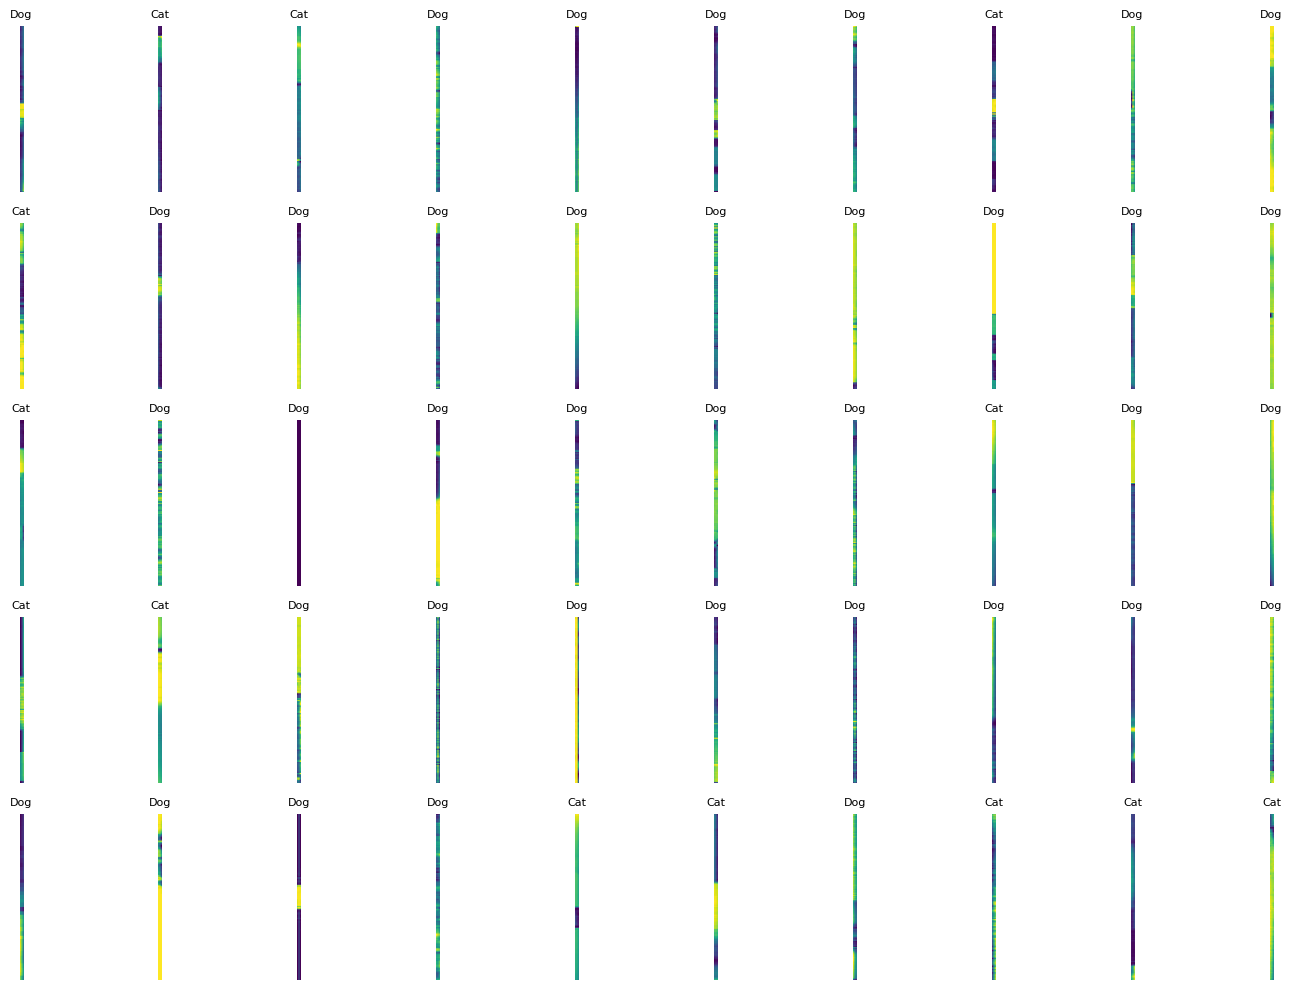

In [44]:
#10
import pandas as pd
import os

test_dir = '/content/cats_and_dogs/test'
filenames = sorted(os.listdir(test_dir))

df = pd.DataFrame({
    'filename': filenames
})

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_data_gen = test_datagen.flow_from_dataframe(
    dataframe=df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False,
    batch_size=1
)

test_images = np.stack([test_data_gen[i][0][0] for i in range(len(test_data_gen))])

predictions = model.predict(test_data_gen)
probabilities = [round(p[0]) for p in predictions]

def plotImages(images, predictions):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i])
        plt.title("Dog" if predictions[i] == 1 else "Cat", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(test_images, probabilities)



In [45]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
